# Exploratory data analysis of the UC Irvine Wine Quality data set

## Problem identification on data provided

The dataset specifies the quality of wine, given a list of attributes. The attributes are fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, and type (0 for red wine, 1 for white wine). These attributes are marked as features for the dataset, and combined with theses features, we can create a label for each data record, and come out the quality of the wine which is a score ranging from 0 to 10. For privacy issue, there is no data of the wine brand, grape types and wine prices to train the model.  

Provided by those features and label, and we can create a supervised machine learning model to predict the quality of wine for unseen data where the quality is not indicated. 

## Read and Split the Data 

In [2]:
import pandas as pd

white_df = pd.read_csv("../data/winequality-white.csv", sep=";")
red_df = pd.read_csv("../data/winequality-red.csv", sep=";")

red_df['type']='red wine'
white_df['type']='white wine'
wine = pd.concat([red_df,white_df]).reset_index().drop(columns = ['index'])

In [3]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(wine, test_size=0.2, random_state=123)

## Data distribution for various quality scores provided 

| Wine Quality Score | Counts |
| -----------: | --------------: |
|          3 |             30 |
|          4 |             216 |
|          5 |             2138 |
|          6 |             2836 |
|          7 |             1079 |
|          8 |             193 |
|          9 |             5 |

After exploring the data distribution for various quality scores, class imbalance could be an issue which require further considerations. As shown in the above table, a vast majority of the sample wines are normal wine; while only a couple of samples are classified as poor or excellent. We may start our model with over- or under-sampling method to balance each class depends on whether it is a vital problem. 

## Summary of the Features

Below table shows the summarized information about the feature columns. Accordingly there is no missing value in the data set, and each column has 6497 entries. We can see that we have numeric columns except one column that has binary categories for red or white wine. The following table indicates counts, minimum, maximum, mean, quartile information of the data for each numerical feature. 

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5197 entries, 6452 to 3582
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5197 non-null   float64
 1   volatile acidity      5197 non-null   float64
 2   citric acid           5197 non-null   float64
 3   residual sugar        5197 non-null   float64
 4   chlorides             5197 non-null   float64
 5   free sulfur dioxide   5197 non-null   float64
 6   total sulfur dioxide  5197 non-null   float64
 7   density               5197 non-null   float64
 8   pH                    5197 non-null   float64
 9   sulphates             5197 non-null   float64
 10  alcohol               5197 non-null   float64
 11  quality               5197 non-null   int64  
 12  type                  5197 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 568.4+ KB


The below table shows the distribution of each numeric features in the data set. The mean and standard deviation vary across different features. Therefore, in the machine learning pipeline, we probably need to add `ColumnTransoformer` to scale the numeric data before training the model. For example, the distribution of free sulfur dioxide and the distribution of citric acid are quite different. 

In [5]:
train_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.00000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000,5197.000000
mean,7.215519,0.338230,0.320073,5.451472,0.056028,30.73629,116.182990,0.994690,3.217897,0.530069,10.493335,5.816240
std,1.298654,0.164058,0.146037,4.769121,0.035179,17.90455,56.898123,0.003019,0.160178,0.149313,1.200092,0.873384
min,3.800000,0.080000,0.000000,0.600000,0.012000,1.00000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.00000,78.000000,0.992300,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.00000,118.000000,0.994890,3.210000,0.500000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,42.00000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.00000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [6]:
import altair as alt
# Handle large data sets by not embedding them in the notebook
alt.data_transformers.enable('data_server')

# Save a PNG blob as a backup for when the Altair plots do not render
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

## Data analysis

We are trying to seek the relationship between each of numeric features and how the data is distributed for each feature. When we look at the distribution of the data within a single feature, and it indicates that:

- wine quality is approximately normally distributed
- fixed acidity have some outliers and peaks between 6 and 7 in wine quality score
- the pH is normally distributed
- volatile acidity has quite a few outliers with high values, also slightly skewed to the right
- most of the wines have citric acid within the range of 0.25-0.30 with few other spikes at 0.01 and 0.48
- high residual sugar has many outliers and the distribution is skewed right
- chloride distribution is skewed right with many outliers with high chlorides
- distribution of free sulfur dioxide is skewed right for its distribution

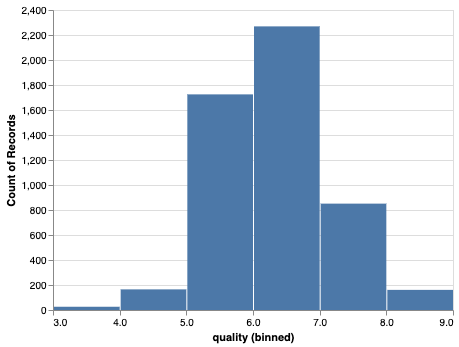

In [7]:
#Target
alt.Chart(train_df).mark_bar().encode(
    x=alt.X('quality', bin=alt.Bin(maxbins=7)),
    y='count()',
    tooltip='count()')

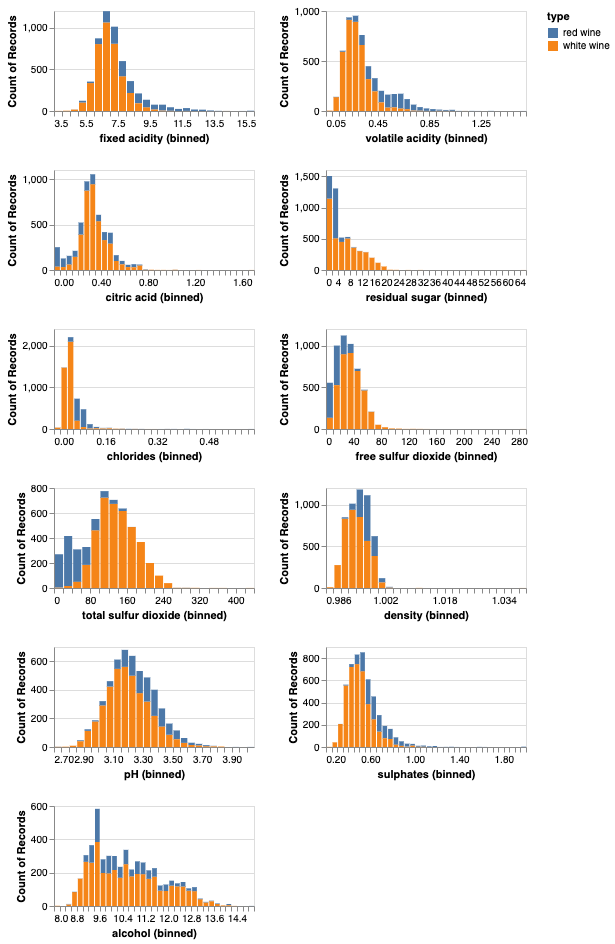

In [8]:
#Features
alt.Chart(train_df).mark_bar().encode(
    alt.X(alt.repeat(), type="quantitative", bin=alt.Bin(maxbins=40)),
    y="count()",
    color="type",
).properties(width=200, height=100).repeat(
    (
        wine.select_dtypes(include=["int", "float"])
        .drop(["quality"], axis=1)
        .columns.to_list()
    ),
    columns=2,
)

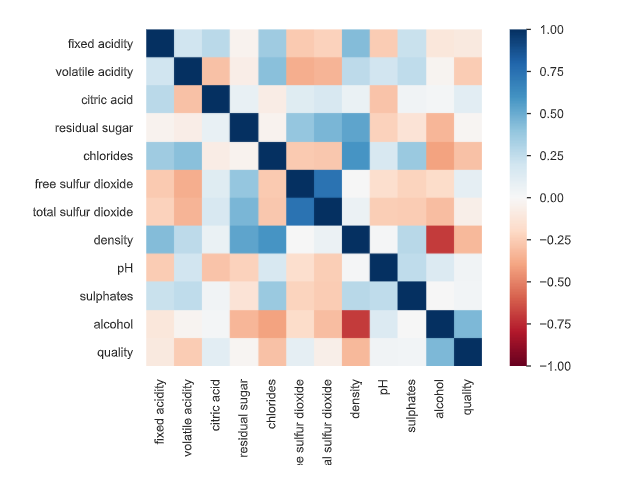

By exploring the features correlation matrix, we identified that some features are highly correlated, and we may choose to drop some redundant features in the process of feature selection. And some features illustrate weak correlation with our target value (quality); so, we may drop those features as well. For example, sulphates and pH seems have around 0 correlation with the target value, and we will explore more on those features and take into considerations later in the project.

# Reference
[1] [Art of Data Science] (https://leanpub.com/artofdatascience) by Roger Peng & Elizabeth Matsui